In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = "../data/census/race/"
poverty_df_21 = pd.read_csv(PATH + "race_2021.csv")
poverty_df_20 = pd.read_csv(PATH + "race_2020.csv")
poverty_df_19 = pd.read_csv(PATH + "race_2019.csv")
poverty_df_18 = pd.read_csv(PATH + "race_2018.csv")
poverty_df_17 = pd.read_csv(PATH + "race_2017.csv")
poverty_df_16 = pd.read_csv(PATH + "race_2016.csv")
poverty_df_15 = pd.read_csv(PATH + "race_2015.csv")
poverty_df_14 = pd.read_csv(PATH + "race_2014.csv")

In [3]:
# White
# Black or African American
# American Indian and Alaska Native
# Asian
# Native Hawaiian and Other Pacific Islander
# Some Other Race alone

def fix_labels(df):
    df["Label (Grouping)"] = df["Label (Grouping)"].map(lambda x: x.lstrip('\xa0'))

    
def get_topics_idcs(df):
    return df[df.isna().any(axis=1)].index


def get_topics(df):
    # Get IDCS of Grouping Rows
    idcs = get_topics_idcs(df)
    idx_pairs = [(idcs[i], idcs[i+1]) if i < (len(idcs) - 1) else (idcs[i],) for i in range(len(idcs))]
    
    # Format the labels
    fix_labels(df)
    
    labels = df.iloc[idcs]["Label (Grouping)"].values
    return list(zip(idx_pairs, labels))


def get_all_sub_dfs(df):
    
    all_subtopics = get_topics(df)
    topic = {}
    subtopics = []
    
    for subtopic_idcs, subtopic in all_subtopics:
        
        if len(subtopic_idcs) == 2:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:subtopic_idcs[1]]
        else:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:]
            
        # Check whether the first row contains values of interest
        if not df.iloc[0].isna().any():
            topic[subtopic].loc[-1] = df.loc[0]                # adding a row
            topic[subtopic].index = topic[subtopic].index + 1  # shifting index
            topic[subtopic] = topic[subtopic].sort_index()     # sorting by index

            
        topic[subtopic] = topic[subtopic].rename(columns={"Label (Grouping)": subtopic})
        topic[subtopic].set_index(subtopic, inplace=True)
        subtopics.append(subtopic)
            
    subtopics = '\n'.join([subtopic for subtopic in subtopics])
    print("The subtopics are:")
    print(subtopics)
    
    return topic


def get_percent_float(x_string):
    ls = x_string[:-1].split(".")
    if len(ls[0]) == 1:
        return float("0.0" + "".join(ls))
    elif len(ls[0]) == 2:
        return float("0." + "".join(ls))
    else:
        return float("".join(ls)) / 100
    

def convert_series_to_int(series):
    try:
        new_series = [int("".join(x.split(","))) if type(x) == str else x for x in series.values]
    except:
        new_series = [float(get_percent_float(x)) if type(x) == str and "." in x else x for x in series.values]
    return np.asarray(new_series)


def convert_series_to_percent(series):
    new_series = [float("0."+"".join(x[:-1].split("."))) if type(x) == str else x for x in series.values]
    return np.asarray(new_series)
    


In [4]:
fix_labels(poverty_df_21)
fix_labels(poverty_df_20)
fix_labels(poverty_df_19)
fix_labels(poverty_df_18)
fix_labels(poverty_df_17)
fix_labels(poverty_df_16)
fix_labels(poverty_df_15)
fix_labels(poverty_df_14)

In [5]:
poverty_dict_21 = get_all_sub_dfs(poverty_df_21)
poverty_dict_20 = get_all_sub_dfs(poverty_df_20)
poverty_dict_19 = get_all_sub_dfs(poverty_df_19)
poverty_dict_18 = get_all_sub_dfs(poverty_df_18)
poverty_dict_17 = get_all_sub_dfs(poverty_df_17)
poverty_dict_16 = get_all_sub_dfs(poverty_df_16)
poverty_dict_15 = get_all_sub_dfs(poverty_df_15)
poverty_dict_14 = get_all_sub_dfs(poverty_df_14)

The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH
MARITAL STATUS
EDUCATIONAL ATTAINMENT
INDIVIDUALS' INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)
POVERTY STATUS IN THE PAST 12 MONTHS
PERCENT ALLOCATED
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH
MARITAL STATUS
EDUCATIONAL ATTAINMENT
INDIVIDUALS' INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)
POVERTY STATUS IN THE PAST 12 MONTHS
PERCENT ALLOCATED
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH
MARITAL STATUS
EDUCATIONAL ATTAINMENT
INDIVIDUALS' INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)
POVERTY STATUS IN THE PAST 12 MONTHS
PERCENT ALLOCATED
The subtopics are:
AGE
SEX
RACE AND HISPANIC OR LATINO ORIGIN
LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH
MARITAL STATUS
EDUCATION

In [8]:
poverty_race_21 = poverty_dict_21["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_20 = poverty_dict_20["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_19 = poverty_dict_19["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_18 = poverty_dict_18["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_17 = poverty_dict_17["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_16 = poverty_dict_16["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_15 = poverty_dict_15["RACE AND HISPANIC OR LATINO ORIGIN"]
poverty_race_14 = poverty_dict_14["RACE AND HISPANIC OR LATINO ORIGIN"]

In [9]:
poverty_race_years = [poverty_race_21, poverty_race_20, poverty_race_19, poverty_race_18, poverty_race_17,
                      poverty_race_16, poverty_race_15, poverty_race_14]

for idx in range(len(poverty_race_years)):
    
    # Preprocess data
    all_columns = []
    for column in poverty_race_years[idx].iloc[:-1].columns:
        if "Percent" in column:
            all_columns.append(column)

    poverty_race_years[idx].drop(columns=all_columns, inplace=True)
    poverty_race_years[idx] = poverty_race_years[idx].apply(convert_series_to_int)

    poverty_race_years[idx].columns = [x[1].split(", District")[0][1:] + " - " + x[-1].split("!!")[1] for x in poverty_race_years[idx].columns.str.split("Census")]
    poverty_race_years[idx] = poverty_race_years[idx].iloc[:-2]

In [10]:
# What would be good to look at?

# 1. Percentage of Tract that is below poverty level
# 2. Percentage of which race makes up which portion of Below poverty level
# 3. Percentage of how many of a race are below poverty level

poverty_race_years[0]

,Tract 64 - Total,Tract 64 - Native; born in state of residence,Tract 64 - Native; born in other state in the U.S.,Tract 64 - Native; born outside U.S.,Tract 102.01 - Total,Tract 102.01 - Native; born in state of residence,Tract 102.01 - Native; born in other state in the U.S.,Tract 102.01 - Native; born outside U.S.,Tract 102.02 - Total,Tract 102.02 - Native; born in state of residence,...,Tract 105 - Native; born in other state in the U.S.,Tract 105 - Native; born outside U.S.,Tract 110.01 - Total,Tract 110.01 - Native; born in state of residence,Tract 110.01 - Native; born in other state in the U.S.,Tract 110.01 - Native; born outside U.S.,Tract 110.02 - Total,Tract 110.02 - Native; born in state of residence,Tract 110.02 - Native; born in other state in the U.S.,Tract 110.02 - Native; born outside U.S.
RACE AND HISPANIC OR LATINO ORIGIN,,,,,,,,,,,,,,,,,,,,,
Total population,"2,492","1,382",984,39,"2,522",517,"1,603",50,"1,960",176,...,"2,240",111,"2,385",385,"1,783",91,"1,519",258,"1,000",62
One race,0.984,0.987,0.977,10.0,0.873,0.685,0.951,0.5,0.907,0.75,...,0.931,0.396,0.951,0.86,0.965,10.0,0.929,0.791,0.946,10.0
White,0.22,0.032,0.485,0.718,0.521,0.172,0.711,0.16,0.485,0.136,...,0.695,0.396,0.595,0.081,0.725,0.516,0.71,0.516,0.766,10.0
Black or African American,0.74,0.925,0.492,0.282,0.276,0.513,0.205,0.0,0.32,0.313,...,0.196,0.0,0.332,0.696,0.241,0.484,0.158,0.275,0.169,0.0
American Indian and Alaska Native,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Asian,0.015,0.014,0.0,0.0,0.062,0.0,0.036,0.34,0.036,0.0,...,0.025,0.0,0.024,0.083,0.0,0.0,0.045,0.0,0.0,0.0
Native Hawaiian and Other Pacific Islander,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Some other race,0.008,0.015,0.0,0.0,0.015,0.0,0.0,0.0,0.065,0.301,...,0.008,0.0,0.0,0.0,0.0,0.0,0.016,0.0,0.011,0.0
Two or more races,0.016,0.013,0.023,0.0,0.127,0.315,0.049,0.5,0.093,0.25,...,0.069,0.604,0.049,0.14,0.035,0.0,0.071,0.209,0.054,0.0


In [11]:
tracts = ["Tract 64", "Tract 102.01", "Tract 102.02", "Tract 105", "Tract 110.01", "Tract 110.02"]
tract_df = poverty_race_years[-1].loc[:, poverty_race_years[-1].columns.str.contains(tracts[0])]
tract_df

,Tract 64 - Total,Tract 64 - Native; born in state of residence,Tract 64 - Native; born in other state in the U.S.,Tract 64 - Native; born outside U.S.
RACE AND HISPANIC OR LATINO ORIGIN,,,,
Total population,"1,986","1,366",495,22
One race,10.0,10.0,10.0,10.0
White,0.052,0.0,0.208,0.0
Black or African American,0.908,0.993,0.776,10.0
American Indian and Alaska Native,0.005,0.007,0.0,0.0
Asian,0.027,0.0,0.0,0.0
Native Hawaiian and Other Pacific Islander,0.0,0.0,0.0,0.0
Some other race,0.008,0.0,0.016,0.0
Two or more races,0.0,0.0,0.0,0.0


In [12]:
tract_df.iloc[2:, 0].values[:2].astype(np.float32)

array([0.052, 0.908], dtype=float32)

In [13]:
# Get appropriate columns for the data frame
# ------------------------------------------
race_labels = np.asarray([x.split(" alone")[0] for x in list(poverty_race_years[0].index)])
new_columns = race_labels[1:]
new_columns[-1] = "Mixed race"

In [14]:

# Get data
# --------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2020", "2019", "2018", "2017", "2016", "2015", "2014"]


poverty_by_tract = {}
for tract in tracts:

    poverty_by_year = {}
    
    for idx, year in enumerate(years):
        
        try:

            tract_df = poverty_race_years[idx].loc[:, poverty_race_years[idx].columns.str.contains(tract)]
            values = tract_df.iloc[2:, 0].values[:2].astype(np.float32)

            # poverty_by_tract[tract] = all_values
            poverty_by_year[year] = values
            
        except IndexError:
            continue
            
    # reverse the dictionary to stay in chronological order
    poverty_by_tract[tract] = dict(reversed(list(poverty_by_year.items())))
    

In [15]:
poverty_by_tract["Tract 64"]

{'2014': array([0.052, 0.908], dtype=float32),
 '2015': array([0.098, 0.868], dtype=float32),
 '2016': array([0.111, 0.856], dtype=float32),
 '2017': array([0.136, 0.855], dtype=float32),
 '2018': array([0.213, 0.759], dtype=float32),
 '2019': array([0.205, 0.767], dtype=float32),
 '2020': array([0.19, 0.77], dtype=float32),
 '2021': array([0.22, 0.74], dtype=float32)}

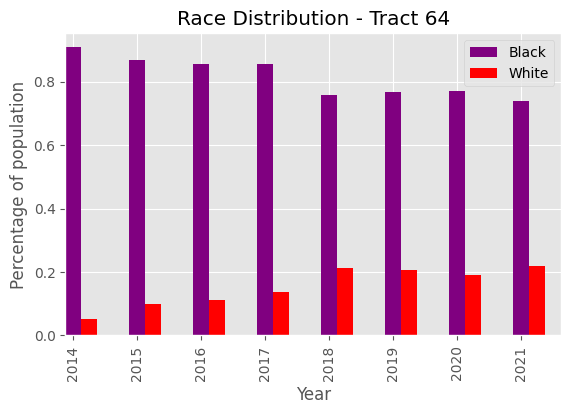

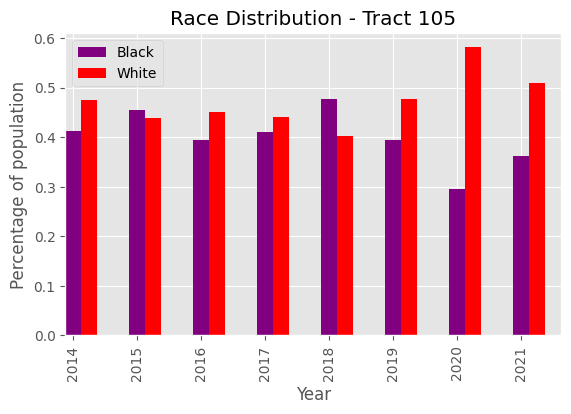

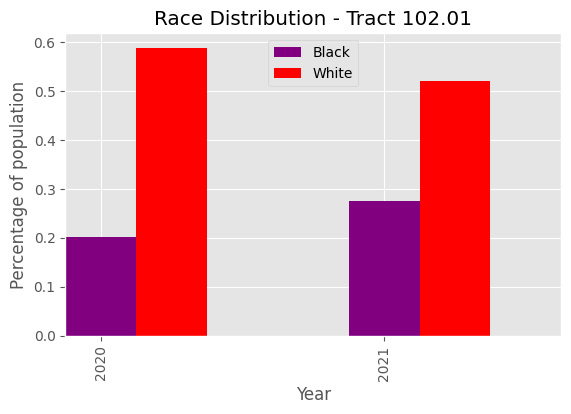

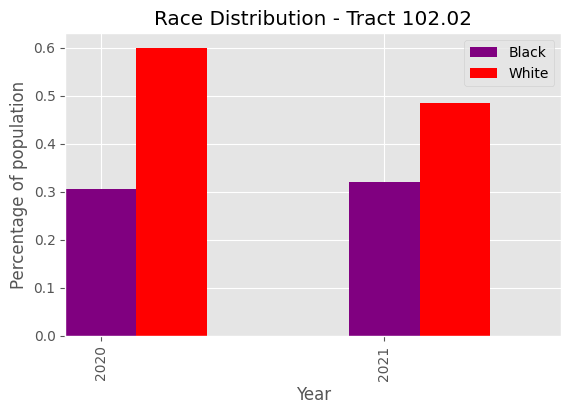

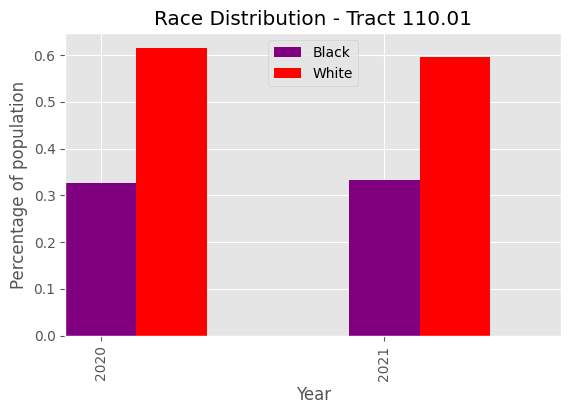

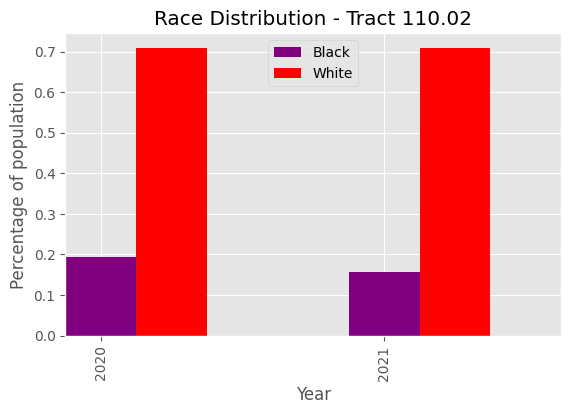

In [17]:
# Plot data
# ---------
import matplotlib
matplotlib.style.use('ggplot')

for tract in tracts:
    fig, ax = plt.subplots()

    df_for_plotting = pd.DataFrame.from_dict(poverty_by_tract[tract], orient="index", columns=["White", "Black"])

    # drop empty columns

    df_for_plotting["Black"].plot(color=["purple"], 
                         kind="bar", title=f"Race Distribution - {tract}", ax=ax, position=0.5, width=0.25, legend=True)
    df_for_plotting["White"].plot(color=["red"], 
                         kind="bar", stacked=True, ax=ax, position=-0.5, width=0.25, legend=True)

    plt.gcf().subplots_adjust(bottom=0.25)
    plt.xlabel("Year")
    plt.ylabel("Percentage of population")
    plt.savefig(f"../plots/race/race_per_tract/race_tract_{tract}_new.png")

In [99]:
# 1. Percentage of Tract that is below poverty level


# Get the data
# ------------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2020", "2019", "2018", "2017", "2016", "2015"]


poverty_by_tract = {}
for tract in tracts:

    poverty_by_year = {}
    
    for idx, year in enumerate(years):
        
        try:
            tract_df = poverty_race_years[idx].loc[:, poverty_race_years[idx].columns.str.contains(tract)]

            # Get total number of people below and above poverty level
            above_poverty = tract_df.iloc[0].values[0] - tract_df.iloc[0].values[1]
            all_values = np.append(tract_df.iloc[1:, 1].values.sum(), above_poverty)

            # poverty_by_tract[tract] = all_values
            poverty_by_year[year] = all_values
        except IndexError:
            continue
            
    # reverse the dictionary to stay in chronological order
    poverty_by_tract[tract] = dict(reversed(list(poverty_by_year.items())))

In [100]:
poverty_by_tract["Tract 64"]

{'2014': array([1866, 1053]),
 '2015': array([ 943, 1187]),
 '2016': array([1100, 1355]),
 '2017': array([1229, 1259]),
 '2018': array([ 898, 1671]),
 '2019': array([1007, 1827]),
 '2020': array([ 957, 1504]),
 '2021': array([1046, 1372])}

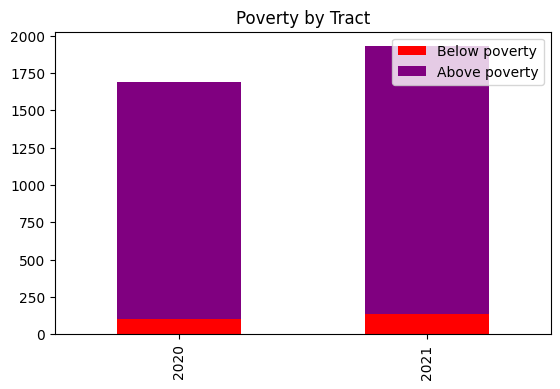

In [109]:
# Plot the data
# -------------
df_for_plotting = pd.DataFrame.from_dict(poverty_by_tract["Tract 102.02"], orient="index", columns=["Below poverty", "Above poverty"])
df_for_plotting.plot(color=["red", "purple"], kind="bar", stacked=True, title="Poverty by Tract")
plt.gcf().subplots_adjust(bottom=0.25)

plt.savefig("../plots/race/poverty_tract_102_2_per_year.png")

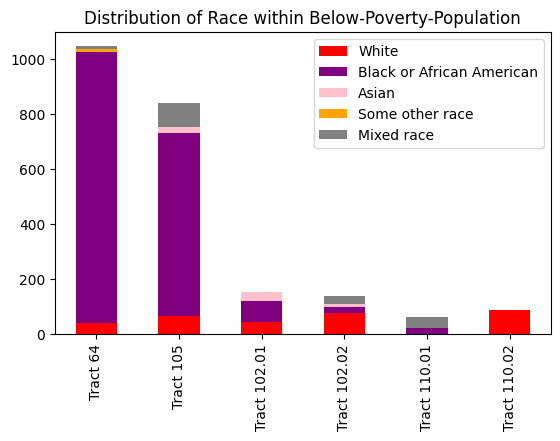

In [306]:
# 2. Percentage of which race makes up which portion of Below Poverty level


# Get appropriate columns for the data frame
# ------------------------------------------
race_labels = np.asarray([x.split(" alone")[0] for x in list(poverty_race.index)])
new_columns = race_labels[1:]
new_columns[-1] = "Mixed race"


# Get data
# --------
tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]

poverty_by_tract = {}

for tract in tracts:
    tract_df = poverty_race.loc[:, poverty_race.columns.str.contains(tract)]
    values = tract_df.iloc[1:, 1].values
    
    poverty_by_tract[tract] = values
    
    
# Plot data
# ---------
df_for_plotting = pd.DataFrame.from_dict(poverty_by_tract, orient="index", columns=new_columns)

# drop empty columns
df_for_plotting = df_for_plotting.drop(["American Indian and Alaska Native", "Native Hawaiian and Other Pacific Islander"], axis=1)
df_for_plotting.plot(color=["red", "purple", "pink", "orange", "gray"], 
                     kind="bar", stacked=True, title="Distribution of Race within Below-Poverty-Population")

plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig("../plots/race/distribution_of_race_below_poverty_per_tract.png")